# Practice Session 03: Networks from text

*Introduction to Network Science* (2025/26), UPF

Author: <font color="blue">Stuart Lance Richards-Weir</font>

E-mail: <font color="blue">stuartlance.richardsweir01@estudiant.upf.edu</font>

Date: <font color="blue">15/10/2025</font>

# 1. Create the directed mention network

In [274]:
import io
import json
import gzip
import csv
import re

In [275]:
# Input file
COMPRESSED_INPUT_FILENAME = "data/CovidLockdownCatalonia.json.gz"   # You may need to change this filepath depending on where you've saved the data file

# These are the output files, leave as-is
OUTPUT_ALL_EDGES_FILENAME = "CovidLockdownCatalonia.csv"
OUTPUT_FILTERED_EDGES_FILENAME = "CovidLockdownCatalonia-min-weight-filtered.csv"
OUTPUT_CO_MENTIONS_FILENAME = "CovidLockdownCatalonia-co-mentions.csv"

## 1.1. Extract mentions

In [276]:
# Leave this code as-is

def extract_mentions(text):
    return re.findall("@([a-zA-Z0-9_]{5,20})", text)

print(extract_mentions("RT @elnacionalcat: check this post by @en_blau"))

['elnacionalcat', 'en_blau']


## 1.2. Count mentions


In [277]:
with gzip.open(COMPRESSED_INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
    for i,line in enumerate(input_file):
        tweet = json.loads(line)

        if tweet["user"]["screen_name"] == "joanmariapique":
            print(tweet["full_text"])
            print(extract_mentions(tweet["full_text"]))

RT @emergenciescat: ⚠️ El @govern demana a la ciutadania limitar al màxim i, si es pot, EVITAR DESPLAÇAMENTS innecessaris. Tot el que sigui…
['emergenciescat', 'govern']
RT @salutcat: Contenir el 🦠 #coronavirus SARS-CoV-2 és reponsabilitat de tots 👩‍👩‍👦‍👦

🔹 Protegim les persones vulnerables
🔹 Evitem saturar…
['salutcat']
RT @QuimTorraiPla: Guanyarem si posem el bé comú i la solidaritat entre tots al davant de tot. Som davant d’un repte majúscul del país. Ens…
['QuimTorraiPla']
RT @MiquelBuch: Gràcies a @mossos, @emergenciescat, @bomberscat i @semgencat pel bon procediment durant el confinament de la Conca d'Òdena.…
['MiquelBuch', 'mossos', 'emergenciescat', 'bomberscat', 'semgencat']
RT @ecasajoana: El Robert-Koch Institut declara #Madrid com a zona de risc. El govern alemany recomana quarentena a qui vingui d'allà.  (Ro…
['ecasajoana']
RT @catalangov: Spokesperson @meritxellbudo: “We reiterate the request President @QuimTorraiPla has made to @sanchezcastejon – to stop peop…
['catalan

In [278]:
mentions_counter = {}

with gzip.open(COMPRESSED_INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
    for i, line in enumerate(input_file):
        # if i > 10: break  # Just for quick tests 
        tweet = json.loads(line) # Grabs each tweet
        
        mentions = extract_mentions(tweet["full_text"]) # Takes a list of mentions in the tweet
        
        for m in mentions:
            key = (tweet["user"]["screen_name"], m)
            if key in mentions_counter:
                mentions_counter[key] += 1
            else:
                mentions_counter[key] = 1
    
    print(mentions_counter)

{('Old_Nemo', 'aramateix'): 1, ('Old_Nemo', 'govern'): 1, ('rhinomni', 'RBReich'): 1, ('ForquillaBDN', 'Totbadalona'): 1, ('ZainulAriffn', 'rafiziramli'): 1, ('sarizor', 'gominolasdpetro'): 1, ('lunavegan', 'borisbarrera'): 1, ('XaviMarti5', 'XSalaimartin'): 2, ('Gotirb', 'nichcarlson'): 1, ('suruasinoiD', 'marctarinmarti'): 1, ('GuifrePpcc', 'MACanadell'): 1, ('Lajurita', 'boticariagarcia'): 1, ('marta_ter', 'EmilioMorenatti'): 1, ('AndreuCriquet', 'decaminoapekin'): 1, ('LLUISNARO', 'angeliufus'): 1, ('SpanishDan1', 'Pumpkinz16'): 1, ('tutmosh', 'brasil247'): 1, ('JavierBcn72', 'FincaSantaMarga'): 1, ('annetakawaii', 'XSalaimartin'): 1, ('emicaza', 'SaludPublicaEs'): 1, ('PregonerSantEst', 'polispol'): 1, ('irisgonzalezaf', 'ChicoMeteoro'): 1, ('maarinaacastroo', 'Rodrigotb__'): 1, ('jdc_jesu', 'Sayo_cab75'): 1, ('jlvndr', 'GillianHTurner'): 1, ('annamfabra', 'javihdez'): 1, ('Carrerasxavi', 'HectorPumo'): 1, ('JorginaMarser', 'IldeVrMy'): 1, ('JorginaMarser', 'pr_soc'): 1, ('mirovir

In [279]:
print(mentions_counter[('joanmariapique', 'catalangov')])

9


In [280]:
# print(mentions_counter.items()) 
# print(mentions_counter.keys())

#for key in mentions_counter.keys():
#    print(key[0], "mentioned", key[1], mentions_counter[key], "times")

# for key in mentions_counter.keys():
#     reverse = (key[1], key[0])
#     total_mentions = mentions_counter[key] + (mentions_counter[reverse] if reverse in mentions_counter.keys() else 0)
#     if total_mentions > 8:
#         print(f"Accounts @{key[0]} and @{key[1]} mention each other {total_mentions} times")  # Need set for this to avoid double counting


printed = set()
for key in mentions_counter.keys():
    pair = tuple(sorted(key))  # ('a', 'b') and ('b', 'a') become ('a', 'b')
    if pair in printed:
        continue # already printed this pair
    reverse = (key[1], key[0])
    total_mentions = mentions_counter[key] + (mentions_counter[reverse] if reverse in mentions_counter.keys() else 0)
    if total_mentions > 8:
        print(f"Accounts @{key[0]} and @{key[1]} mention each other {total_mentions} times")
        printed.add(pair)

Accounts @wualaswold1 and @updayESP mention each other 9 times
Accounts @emocionycambio and @DrTedros mention each other 16 times
Accounts @FXstreetNews and @HareshMenghani mention each other 11 times
Accounts @MargaXrepublica and @MargaXrepublica mention each other 12 times
Accounts @Txesnut1 and @DrEricDing mention each other 11 times
Accounts @joanmariapique and @catalangov mention each other 9 times


## 1.3 Save network

In [281]:
# Leave this code as-is

lines_written = 0

with io.open(OUTPUT_ALL_EDGES_FILENAME, "w") as output_file:
    writer = csv.writer(output_file, delimiter='\t', quotechar='"')
    writer.writerow(["Source", "Target", "Weight"])
    for key in mentions_counter:
        author = key[0]
        mention = key[1]
        weight = mentions_counter[key]
        writer.writerow([author, mention, weight])
        lines_written += 1

print(f"Wrote {lines_written} lines to file {OUTPUT_ALL_EDGES_FILENAME}")

Wrote 34040 lines to file CovidLockdownCatalonia.csv


In [282]:
lines_written = 0

with io.open(OUTPUT_FILTERED_EDGES_FILENAME, "w") as output_file:
    writer = csv.writer(output_file, delimiter='\t', quotechar='"')
    writer.writerow(["Source", "Target", "Weight"])
    for key in mentions_counter:
        author = key[0]
        mention = key[1]
        weight = mentions_counter[key]
        if weight < 3:
            continue
        writer.writerow([author, mention, weight])
        lines_written += 1

print(f"Wrote {lines_written} lines to file {OUTPUT_FILTERED_EDGES_FILENAME}")

Wrote 255 lines to file CovidLockdownCatalonia-min-weight-filtered.csv


# 2. Visualize the directed mention network


In [283]:
# Import required packages

import networkx as nx
import matplotlib.pyplot as plt

In [284]:
with io.open(OUTPUT_FILTERED_EDGES_FILENAME, "rb") as output_file: # the NtworkX function needs file open in rb mode``
    next(output_file)  # Skip the header row
    g = nx.read_weighted_edgelist(output_file, delimiter='\t', create_using=nx.DiGraph())

In [285]:
# Leave this code as-is

list(nx.get_edge_attributes(g, 'weight').items())[:10]

[(('AlfonsGorina', 'movieweb'), 5.0),
 (('McIslamofobia', 'carlesplb'), 3.0),
 (('marsicilia', 'javiernegre10'), 4.0),
 (('wualaswold1', 'updayESP'), 9.0),
 (('RedPillDetox', 'TomthunkitsMind'), 7.0),
 (('SpanishDan1', 'fascinatorfun'), 8.0),
 (('SpanishDan1', 'g_gosden'), 6.0),
 (('SpanishDan1', 'BorisJohnson'), 4.0),
 (('SpanishDan1', 'miffythegamer'), 6.0),
 (('SpanishDan1', 'Haggis_UK'), 4.0)]

## 2.1. Extract the largest connected component using NetworkX

In [286]:
# Leave this code as-is

print(f"The network is weakly connected: {nx.is_weakly_connected(g)}")
print(f"The network is strongly connected: {nx.is_strongly_connected(g)}")

The network is weakly connected: False
The network is strongly connected: False


In [287]:
Sub = max(nx.weakly_connected_components(g), key=len)
lcc = g.subgraph(Sub).copy()

print(f"Largest connected component has {len(lcc)} nodes")
print(lcc)



Largest connected component has 90 nodes
DiGraph with 90 nodes and 95 edges


In [288]:
avg_weight = sum(d['weight'] for u, v, d in lcc.edges(data=True)) / lcc.number_of_edges()
print(f"Average edge weight in lcc: {avg_weight:.2f}")

Average edge weight in lcc: 3.59


In [289]:
# Leave this code as-is

print(f"The network is weakly connected: {nx.is_weakly_connected(lcc)}")
print(f"The network is strongly connected: {nx.is_strongly_connected(lcc)}")

The network is weakly connected: True
The network is strongly connected: False


## 2.2. Visualize the largest connected component


In [290]:
bb = nx.edge_betweenness_centrality(lcc.to_undirected(),normalized=True, weight=None)
list(bb.items())[:10]

for edge in lcc.to_undirected().edges():
    # Add betweenness to both directions if present in lcc
    if lcc.has_edge(*edge):
        lcc[edge[0]][edge[1]]['betweenness'] = bb[edge]
    if lcc.has_edge(edge[1], edge[0]):
        lcc[edge[1]][edge[0]]['betweenness'] = bb[edge]

In [291]:
# Leave this code as-is

top_edges = sorted(lcc.edges(data=True), key=lambda x: x[2]['betweenness'], reverse=True)[:10]
for edge in top_edges:
    print(f"Edge from @{edge[0]} to @{edge[1]} has betweenness {edge[2]['betweenness']:.3f}")

Edge from @joanmariapique to @emergenciescat has betweenness 0.375
Edge from @joanmariapique to @sanchezcastejon has betweenness 0.278
Edge from @EmDicMerce to @sanchezcastejon has betweenness 0.244
Edge from @joanmariapique to @QuimTorraiPla has betweenness 0.234
Edge from @EmDicMerce to @elnacionalcat has betweenness 0.223
Edge from @emocionycambio to @emergenciescat has betweenness 0.182
Edge from @bruixasirenil to @QuimTorraiPla has betweenness 0.134
Edge from @bruixasirenil to @govern has betweenness 0.122
Edge from @MargaXrepublica to @govern has betweenness 0.118
Edge from @Esquitx17 to @sanchezcastejon has betweenness 0.106


In [292]:
# Leave this code as-is (for now)

pos = nx.spring_layout(     # The function returns a dictionary with node positions (2D coordinates)...
    lcc,                    # ...for nodes in the largest connected component...
    weight='betweenness',   # ...using edge betweenness as an attractive force...
    method='energy',        # ...using the energy minimization method (see documentation for details)...
    k=0.1                  # ...with a custom setting for the optimal distance between nodes.
              # We also set the RNG seed to make the layout reproducible.
)

In [293]:
plt.figure(figsize=(20, 13))

# Node sizes and label font sizes proportional to in-degree
in_degrees = dict(lcc.in_degree())
node_sizes = [in_degrees[n]*80 if in_degrees[n] > 0 else 40 for n in lcc.nodes()]
label_font_sizes = [max(8, in_degrees[n]*1.5) for n in lcc.nodes()]

# Edge widths proportional to weight
edge_weights = [lcc[u][v]['weight'] for u, v in lcc.edges()]
edge_widths = [w*0.5 for w in edge_weights]

# Draw nodes
nx.draw_networkx_nodes(
    lcc, pos,
    node_size=node_sizes,
    node_color='skyblue',
    edgecolors='black'
)

# Draw edges
nx.draw_networkx_edges(
    lcc, pos,
    width=edge_widths,
    arrows=True,
    arrowstyle='-|>',
    arrowsize=18,
    edge_color='gray'
)

# Draw labels
for n, fs in zip(lcc.nodes(), label_font_sizes):
    nx.draw_networkx_labels(
        lcc, pos,
        labels={n: n}, # Only label one node at a time - font size varies per node - only accepts int, not int list!!
        font_size=int(fs),
        font_color='black'
    )

plt.axis('off')
plt.tight_layout()
#plt.savefig("mentions-largest-cc.png", dpi=300)
plt.show()

In [294]:
# Calculate and print the diameter of the largest connected component (as undirected)
lcc_undirected = lcc.to_undirected()
diameter = nx.diameter(lcc_undirected)
print(f"Diameter of the largest connected component (undirected): {diameter}")

Diameter of the largest connected component (undirected): 10


In [295]:
# Number of nodes in the largest connected component
lcc_size = lcc.number_of_nodes()

# Number of nodes in the full graph
g_size = g.number_of_nodes()

# Percentage of nodes in the lcc
lcc_percentage = (lcc_size / g_size) * 100

print(f"Largest connected component size: {lcc_size} nodes")
print(f"Percentage of nodes in lcc: {lcc_percentage:.2f}%")

Largest connected component size: 90 nodes
Percentage of nodes in lcc: 25.21%


In [296]:
# Find all weakly connected components in the graph
components = list(nx.weakly_connected_components(g))

# Sort components by size (descending)
components_sorted = sorted(components, key=len, reverse=True)

# Size of the second largest connected component

second_largest_size = len(components_sorted[1])
print(f"Size of the second largest connected component: {second_largest_size} nodes")


Size of the second largest connected component: 17 nodes


This graph shows a very sparse network where a few nodes are the most active and they are connected loosely by much smaller nodes. Also to note is that these large nodes with high in-degree don't seem to have any out-degree, showing that they are not responsive to their mentions. 
It seems as though the majority of this community is focused on health institutions and politics, since Pedro Sanchez, UNESCO, UN_WOMEN and Emergenciescat are all connected here, so we can derive that the topics of these references are around the current stances and actions of these health institutions.

The seed parameter sets the RandomState for the distribution of nodes within the energy minimising algorithm. When it is eliminated and allowed to be random, the positions of the nodes changes each time the pos = nx.spring_layout() is ran. In order to keep the positions the same each time the code is executed, we must set the seed to a specific int, which solidifies the repeatability of the visualisation


## 2.3. Examine degree distributions


In [297]:
# Calculate in-degree and out-degree for all nodes in lcc
in_degrees = [lcc.in_degree(n) for n in lcc.nodes()]
out_degrees = [lcc.out_degree(n) for n in lcc.nodes()]

In [298]:
# Plot in-degree distribution
plt.figure(figsize=(10, 4))
plt.hist(in_degrees, bins=range(0, max(in_degrees)+2), color='tab:blue', edgecolor='black', alpha=0.7)
plt.xlabel('In-degree')
plt.ylabel('Number of nodes')
plt.title('In-degree Distribution')
plt.show()

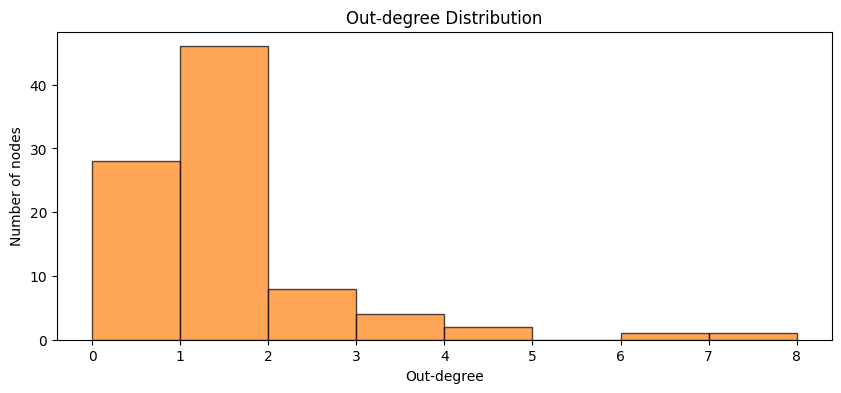

In [299]:
# Plot out-degree distribution
plt.figure(figsize=(10, 4))
plt.hist(out_degrees, bins=range(0, max(out_degrees)+2), color='tab:orange', edgecolor='black', alpha=0.7)
plt.xlabel('Out-degree')
plt.ylabel('Number of nodes')
plt.title('Out-degree Distribution')
plt.show()

In [300]:
# Plot degree distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=range(0, max(in_degrees)+2), alpha=0.7, label='In-degree', color='tab:blue', edgecolor='black')
plt.hist(out_degrees, bins=range(0, max(out_degrees)+2), alpha=0.7, label='Out-degree', color='tab:orange', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('In- and Out-degree Distributions')
plt.legend()

# Scatterplot of in-degree vs out-degree
plt.subplot(1, 2, 2)
plt.scatter(in_degrees, out_degrees, alpha=0.8, color='tab:green', edgecolors='black')
plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.title('Scatterplot of In- vs Out-degree')

plt.tight_layout()
plt.savefig("degree_distributions_and_scatterplot.png", dpi=300)
plt.show()

The degree distributions show a lack of activity from the majority of nodes/users. Most nodes have in-degrees of 2 or less, and the same applies to out-degrees. This seems to show that most people are only making a few mentions, and most of the mentions received are going to lesser-mentioned accounts, whilst only a few accounts, comparatively, are doing a lot of mentioning or being mentioned a lot 

By scatterplot, it appears that nodes can be split into two categories: Those that mention and those that are mentioned. There is a lack of nodes that are mentioned and also mention, as shown by the scatterplot being devoid of nodes in the upper-right quadrant (high in- and out-degree). This seems to show that our largest connected component is held together by unreciprocal node edges (people mention others but are generally not being mentioned back)

# 3. Create the undirected co-mention network


In [301]:
co_mentions_counter = {}

with gzip.open(COMPRESSED_INPUT_FILENAME, "rt", encoding="utf-8") as input_file:
    for line in input_file:
        tweet = json.loads(line)
        mentions = extract_mentions(tweet["full_text"])
        # Only consider tweets with at least two mentions
        if len(mentions) < 2:
            continue
        mentions.sort() # Sort mentions to ensure consistent ordering for pairs
        # Iterate over all unique pairs (user1, user2) where user1 < user2
        for i in range(len(mentions)):
            for j in range(i + 1, len(mentions)): # Ensure j > i to avoid double counting and self-mentions
                if mentions[i] == mentions[j]:
                    continue # Skip self-mentions
                user1, user2 = sorted([mentions[i], mentions[j]]) # Sort to ensure consistent ordering
                key = (user1, user2) 
                if key in co_mentions_counter:
                    co_mentions_counter[key] += 1
                else:
                    co_mentions_counter[key] = 1 # dict must be initialised if not already

In [302]:
print(co_mentions_counter)

{('aramateix', 'govern'): 5, ('IldeVrMy', 'pr_soc'): 2, ('VilaWeb', 'vpartal'): 2, ('Nigel_Farage', 'SteveLawrence_'): 1, ('YahooActualidad', 'microBIOblog'): 1, ('ElJuristaCat', 'ProcuradorsICPB'): 1, ('ElJuristaCat', 'comunicacioicab'): 1, ('ElJuristaCat', 'procuradorsc'): 1, ('ProcuradorsICPB', 'comunicacioicab'): 4, ('ProcuradorsICPB', 'procuradorsc'): 1, ('comunicacioicab', 'procuradorsc'): 1, ('CCOOHMB', 'CCOOsanitat'): 2, ('CCOOHMB', 'MareaBlancaCAT'): 2, ('CCOOHMB', 'Metatron19'): 2, ('CCOOHMB', 'albaverges'): 2, ('CCOOHMB', 'ccoocatalunya'): 2, ('CCOOHMB', 'ccoogirona'): 2, ('CCOOHMB', 'defensanitatBV'): 2, ('CCOOHMB', 'fssccoo'): 2, ('CCOOHMB', 'salutcat'): 2, ('CCOOHMB', 'truetaccoo'): 2, ('CCOOsanitat', 'MareaBlancaCAT'): 4, ('CCOOsanitat', 'Metatron19'): 2, ('CCOOsanitat', 'albaverges'): 2, ('CCOOsanitat', 'ccoocatalunya'): 2, ('CCOOsanitat', 'ccoogirona'): 2, ('CCOOsanitat', 'defensanitatBV'): 2, ('CCOOsanitat', 'fssccoo'): 2, ('CCOOsanitat', 'salutcat'): 2, ('CCOOsanitat

In [303]:
# Leave this code as-is

print(co_mentions_counter[('educaciocat', 'elnacionalcat')])

8


In [304]:
for key in co_mentions_counter.keys():
    if co_mentions_counter[key] > 20:
        print(key[0], "and", key[1], "were co-mentioned", co_mentions_counter[key], "times")


QuimTorraiPla and govern were co-mentioned 92 times
sanchezcastejon and tjparfitt were co-mentioned 28 times
elnacionalcat and joseantich were co-mentioned 90 times
QuimTorraiPla and tjparfitt were co-mentioned 59 times
QuimTorraiPla and sanchezcastejon were co-mentioned 25 times
emergenciescat and govern were co-mentioned 31 times
josepcosta and sanchezcastejon were co-mentioned 49 times
eldiarioes and iescolar were co-mentioned 28 times
gencat and govern were co-mentioned 105 times
mossos and semgencat were co-mentioned 44 times
elnacionalcat and juansrod1 were co-mentioned 30 times
QuimTorraiPla and emergenciescat were co-mentioned 75 times
Antoni_Gelonch and sanchezcastejon were co-mentioned 106 times


In [305]:
lines_written = 0

with io.open(OUTPUT_CO_MENTIONS_FILENAME, "w") as output_file:
    writer = csv.writer(output_file, delimiter='\t', quotechar='"')
    writer.writerow(["Source", "Target", "Weight"])
    for key in co_mentions_counter:
        author = key[0]
        mention = key[1]
        weight = co_mentions_counter[key]
        writer.writerow([author, mention, weight])
        lines_written += 1

print(f"Wrote {lines_written} lines to file {OUTPUT_CO_MENTIONS_FILENAME}")

Wrote 7816 lines to file CovidLockdownCatalonia-co-mentions.csv


# 4. Visualize the undirected co-mention network 

In [306]:
# Build the undirected co-mention network from file
G_co = nx.Graph()
with io.open(OUTPUT_CO_MENTIONS_FILENAME, "r") as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        u, v, w = row['Source'], row['Target'], float(row['Weight'])
        G_co.add_edge(u, v, weight=w)

In [307]:
# Find nodes with degree >= 17
high_degree_nodes = [n for n, d in G_co.degree() if d >= 17]
subG = G_co.subgraph(high_degree_nodes).copy()

print(f"Graph has {len(G_co)} nodes and {G_co.number_of_edges()} edges")
print(f"Subgraph has {len(subG)} nodes and {subG.number_of_edges()} edges")

Graph has 4008 nodes and 7816 edges
Subgraph has 138 nodes and 1823 edges


In [308]:
import numpy as np 

import matplotlib.cm as cm # For colour maps 

In [309]:
# Generate spring layout using edge weights
pos_subG = nx.spring_layout(subG, weight="Weight", k=0.99, iterations=100, seed=42) # Seed for reproducibility and cap iterations to 100

In [310]:
# Node sizes proportional to degree
node_sizes = [subG.degree(n)*50 for n in subG.nodes()]

# Edge widths proportional to weight
edge_widths = [subG[u][v]['weight']*0.3 for u, v in subG.edges()]

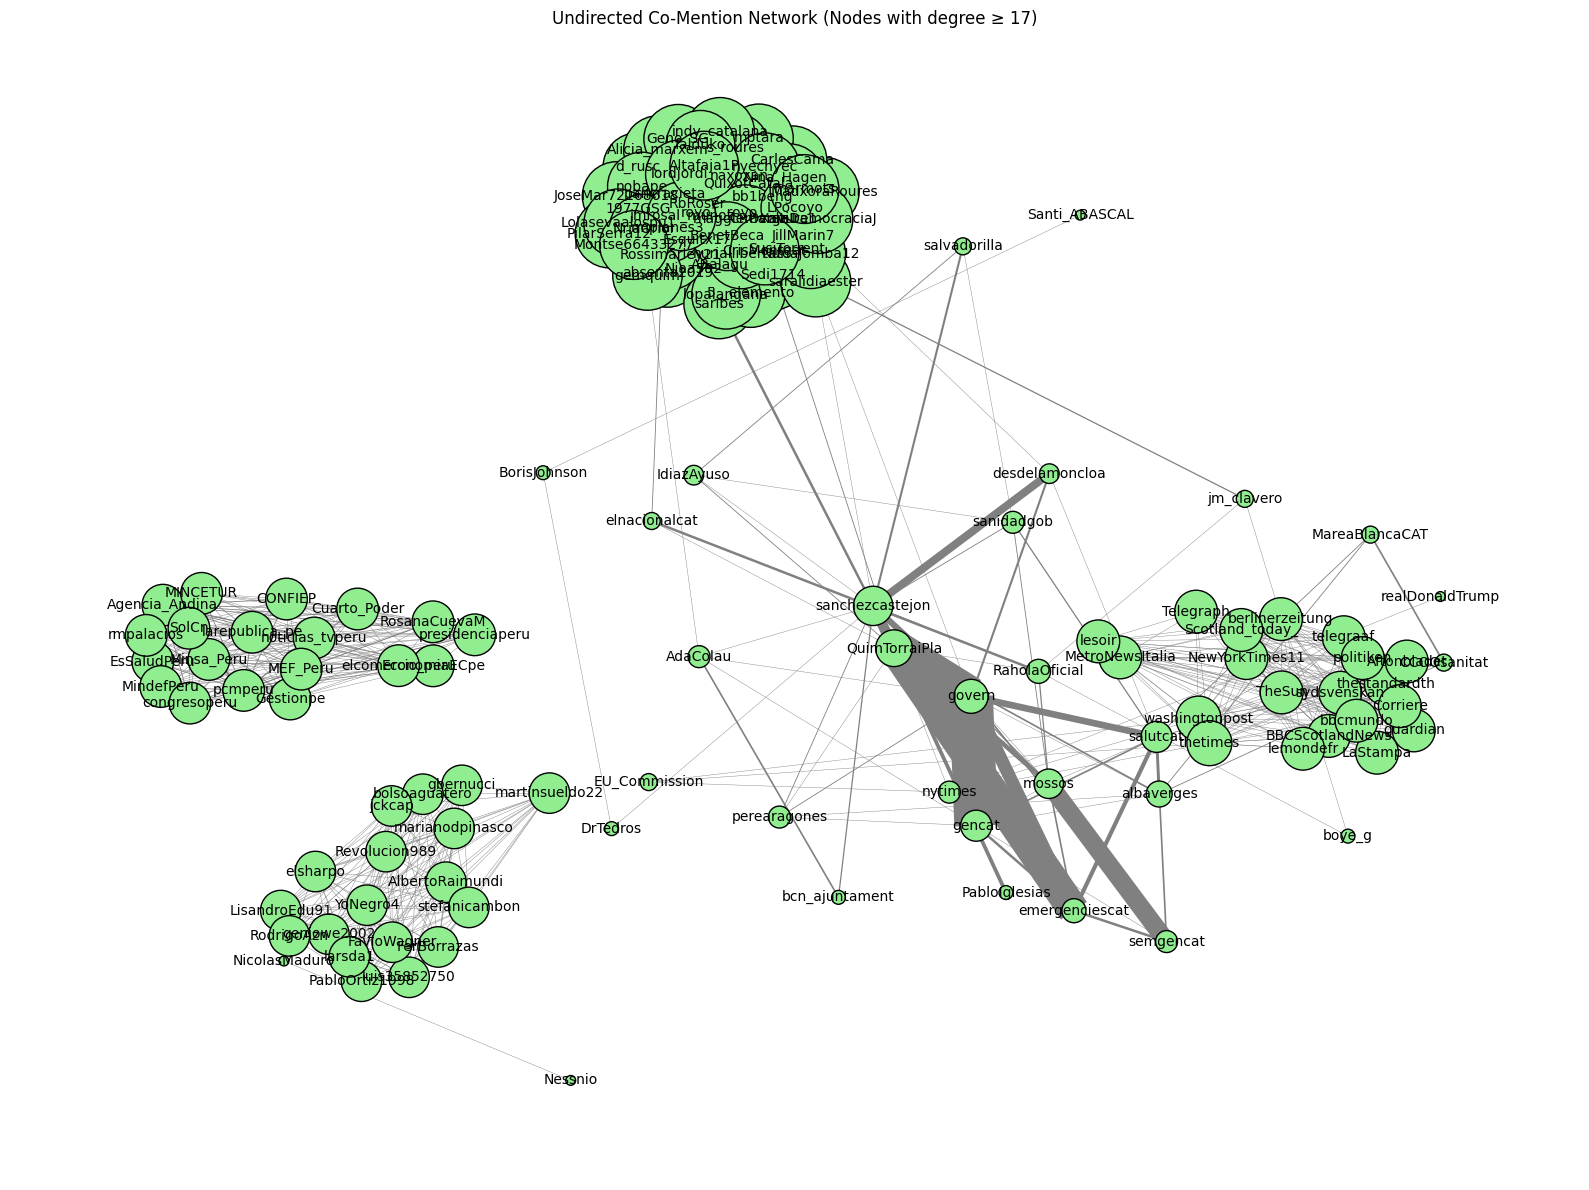

In [311]:
plt.figure(figsize=(16, 12))

nx.draw_networkx_nodes(subG, pos_subG, node_size=node_sizes, node_color='lightgreen', edgecolors='black')
nx.draw_networkx_edges(subG, pos_subG, width=edge_widths, edge_color='gray')
nx.draw_networkx_labels(subG, pos_subG, font_size=10)

plt.title("Undirected Co-Mention Network (Nodes with degree ≥ 17)")
plt.axis('off')
plt.tight_layout()
plt.show()

Here we clearly see that there are multiple connected components, so I will proceed to distinguish them with separate colours


In [312]:


# Find connected components in subG
components = list(nx.connected_components(subG))

# Assign a colour to each component
cmap = cm.get_cmap('tab20', len(components)) # Use a colormap with enough distinct colours
node_color_map = {}
for idx, comp in enumerate(components):
    for node in comp:
        node_color_map[node] = cmap(idx) # Assign colour based on component index

# Prepare node colours in the same order as subG.nodes()!
node_colors = [node_color_map[n] for n in subG.nodes()]

plt.figure(figsize=(16, 12))

nx.draw_networkx_nodes(subG, pos_subG, node_size=node_sizes, node_color=node_colors, edgecolors='black')
nx.draw_networkx_edges(subG, pos_subG, width=edge_widths, edge_color='gray')
nx.draw_networkx_labels(subG, pos_subG, font_size=10)

plt.title("Undirected Co-Mention Network (Nodes with degree ≥ 17, colored by component)")
plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\srwst\AppData\Local\Temp\ipykernel_22160\1305092187.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', len(components)) # Use a colormap with enough distinct colours


This makes the components more easily distinguishable, but due to the layout used, the smallest component of 2 nodes is not quite as easy to identify. So, while maintaining the same type of spring_layout settings, I will apply it to each connected component as their own subgraphs.

In [313]:
print(f"Number of connected components: {len(components)}")

Number of connected components: 4


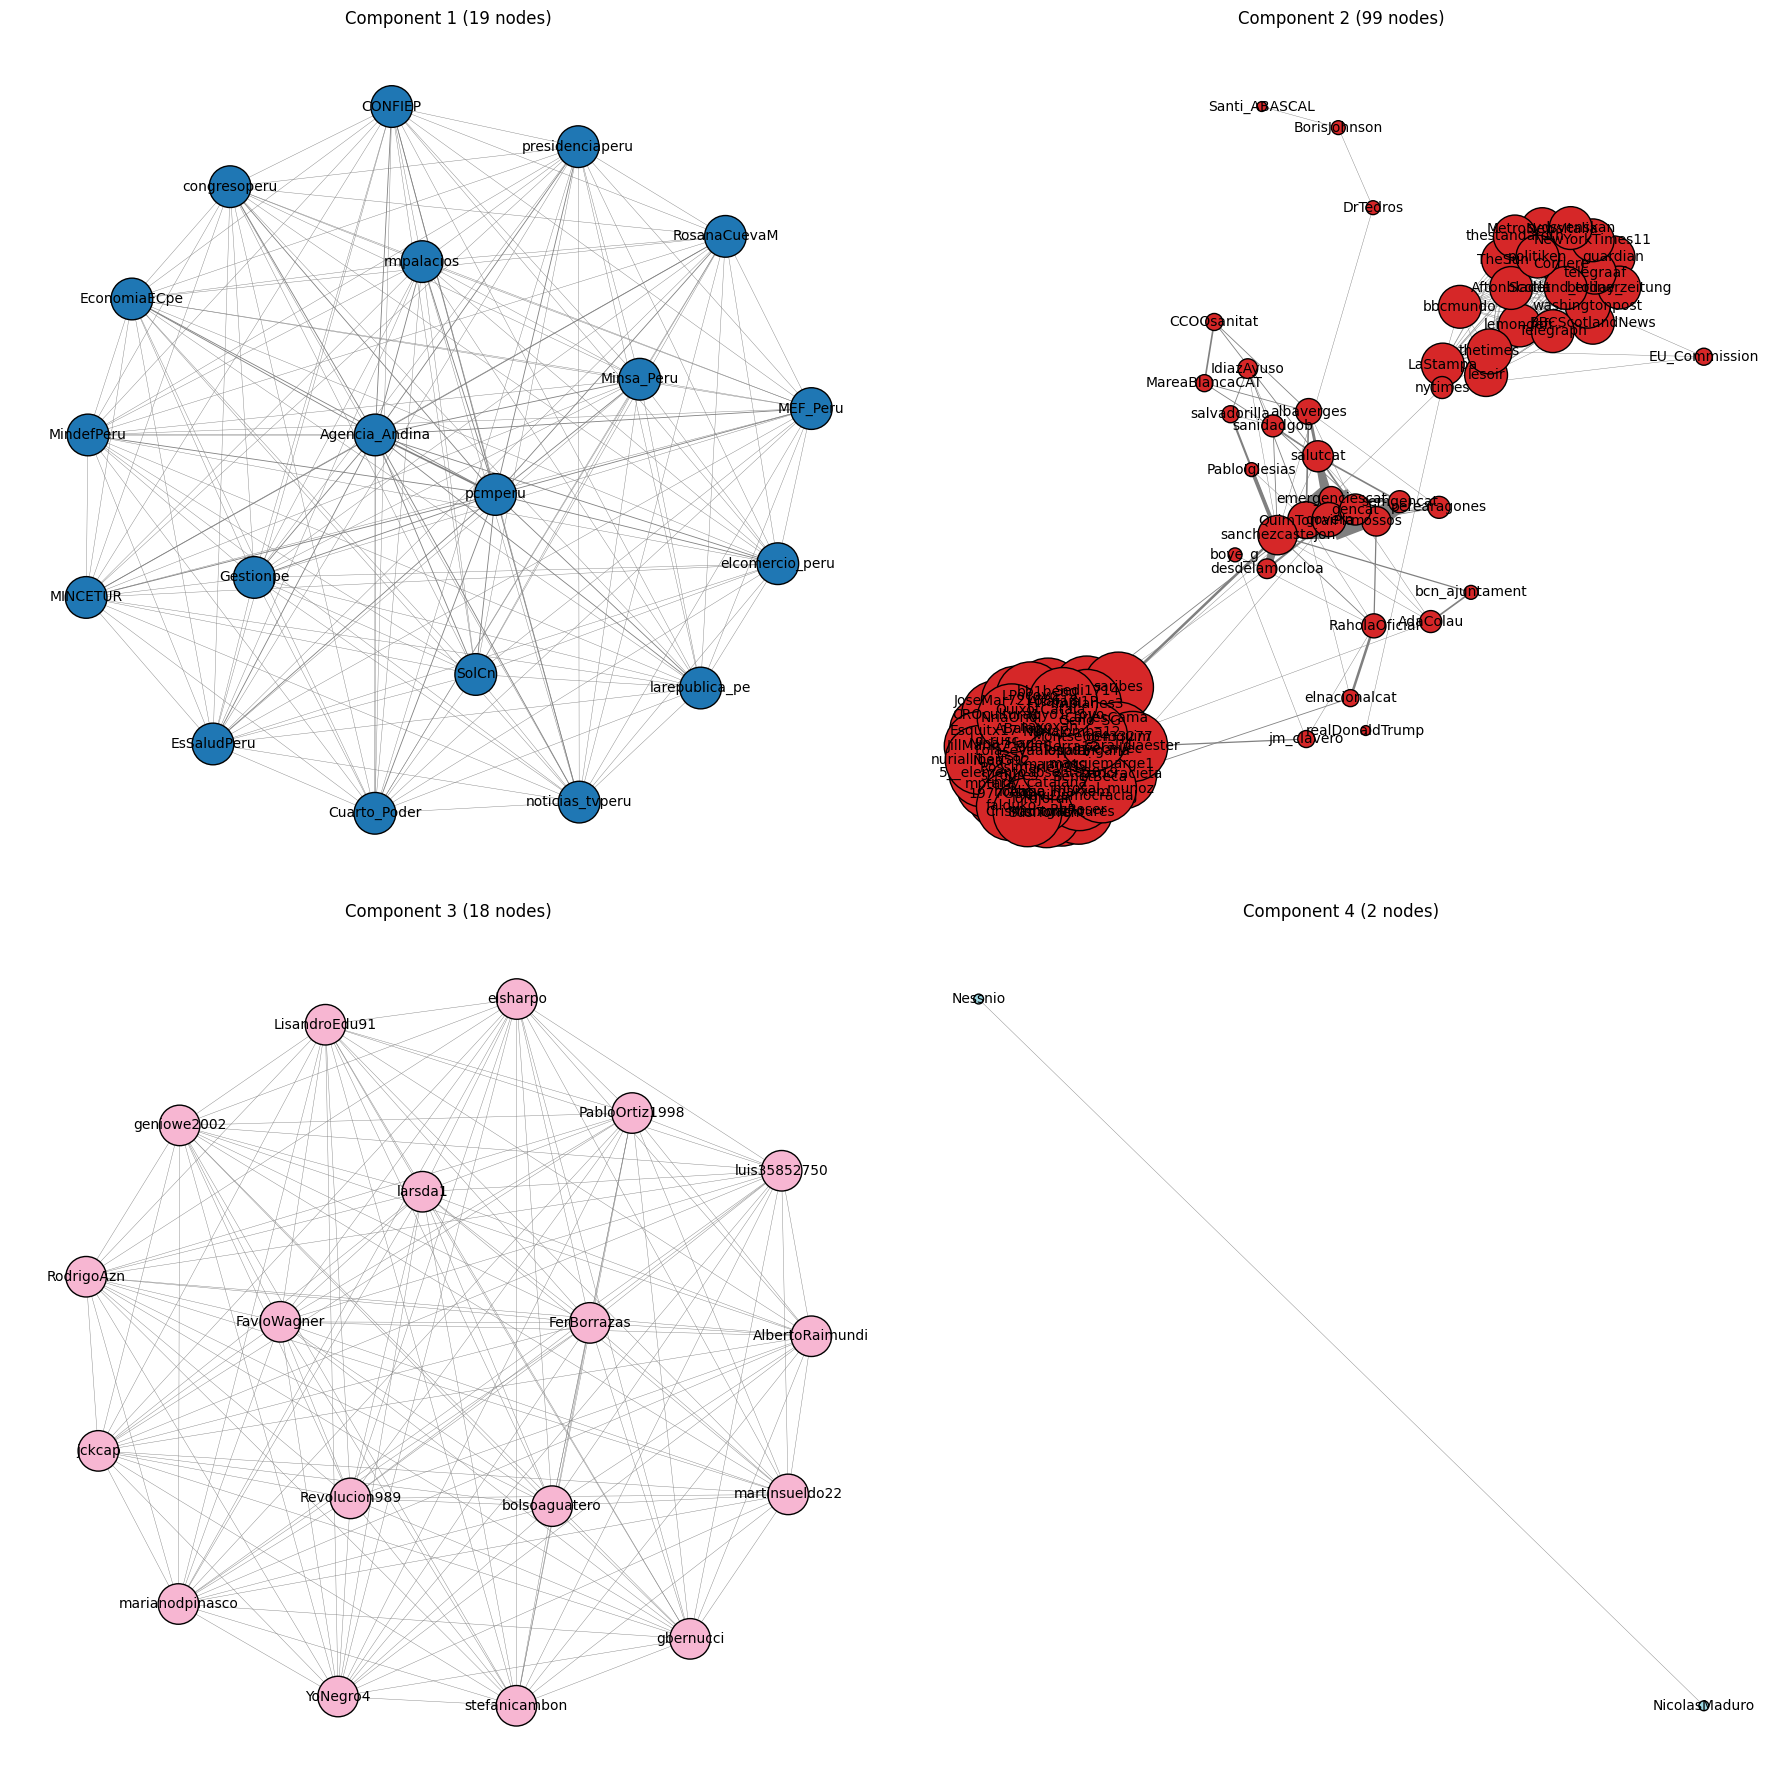

In [314]:
fig, axes = plt.subplots(2, 2, figsize=(18, 18))
axes = axes.flatten()

for idx, comp in enumerate(components):
    sub = subG.subgraph(comp)
    
    pos_sub = nx.spring_layout(sub, weight="weight", k=0.99, iterations=100, seed=42)
    node_sizes_sub = [sub.degree(n)*50 for n in sub.nodes()]
    edge_widths_sub = [sub[u][v]['weight']*0.3 for u, v in sub.edges()]


    # Get node colours for nodes in this subgraph
    sub_node_colors = [node_color_map[n] for n in sub.nodes()]

    nx.draw_networkx_nodes(sub, pos_sub, node_size=node_sizes_sub, node_color=sub_node_colors if len(comp) > 1 else 'lightgray', edgecolors='black', ax=axes[idx])
    nx.draw_networkx_edges(sub, pos_sub, width=edge_widths_sub, edge_color='gray', ax=axes[idx])
    nx.draw_networkx_labels(sub, pos_sub, font_size=10, ax=axes[idx])


    axes[idx].set_title(f"Component {idx+1} ({len(comp)} nodes)")
    axes[idx].axis('off')

plt.tight_layout()
#plt.savefig("co_mentions_components.png", dpi=300)

plt.show()

<font size="+1" color="red">This final visualisation more appropriately shows all the connected components. 1, 3 and 4 are all densely connected whilst 2 (the largest) has a very dense core cluster with more loosely connected satellite clusters around it.

From the names visible in cluster 1, it seems to contain Peruvian media/institutions. Since it is dense, we could assume that these accounts are highly cohesive and are probably talking about similar topics, like national politics/news.

Component 3 has no obvious relation based on the names so it might be simply a case of a close friend group/community the are referencing each other commonly. But, without further investigation (more data, more techniques, etc.) we cannot tell for sure. 

Component 2 is the largest and seems to be more focused on politics of the West. The densely connected satellite cluster is visibly composed of Western Media institutions (BBC, Washington Post, NY Times, La Stampa), which is more loosely connected to political figures (Pedro Sanchez, Boris Johnson, Trump). The most densely connected group seems to be other political accounts, perhaps journalists that are mentioning others' published stories. To be able to tell further we could focus on just that cluster, making the names and connections more visible and from there do further investigation. 

Lastly, component 4 shows just two isolated account that are co-mentioned with degree higher than 17 each. This shows that the community they are a part of is less prevalent/communicative, only two accounts cross the threshold and stand out as the most co-mentioned pair.  </font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, text, and figures were produced by myself.</font>